In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Step 1: Read the CSV file
df = pd.read_csv("/home/neethu/Downloads/titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Step 2: Make 'PassengerId' the index column
df.set_index('PassengerId', inplace=True)

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Step 3: Check the basic details of the dataset
print("Dataset shape:", df.shape)
print("Basic details of the dataset:")
print(df.head())

Dataset shape: (891, 11)
Basic details of the dataset:
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1           

In [11]:
# Check missing values in each column
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [12]:
# Check percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing value percentage:")
print(missing_percentage)

Missing value percentage:
Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [13]:
# Step 4: Fill in missing values in all columns
# Let's fill missing values with the mean for numerical columns and mode for categorical columns
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [14]:
#  again Check missing values in each column
missing_values1 = df.isnull().sum()
print("Missing values:")
print(missing_values1)

Missing values:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [15]:
#  Check and handle outliers in at least 3 columns
#  handling outliers using the IQR method for the 'Age', 'Fare', and 'SibSp' columns

def handle_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

columns_to_handle_outliers = ['Age', 'Fare', 'SibSp']
for column in columns_to_handle_outliers:
    handle_outliers_iqr(column)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

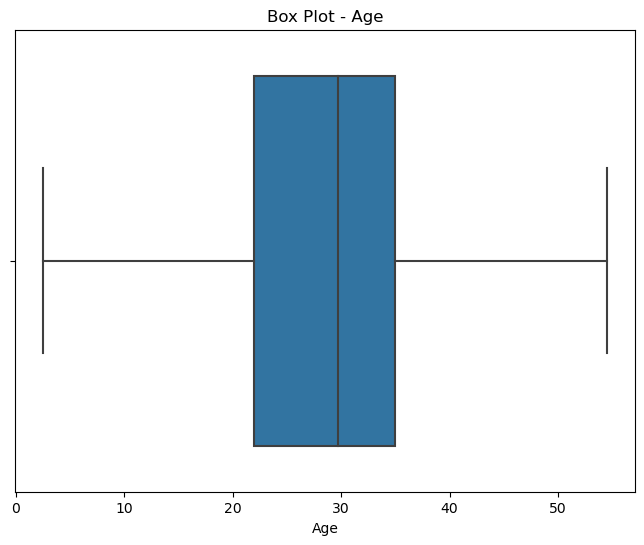

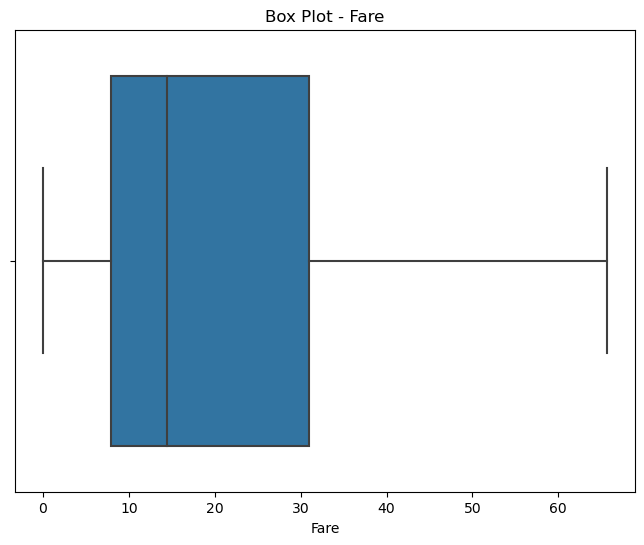

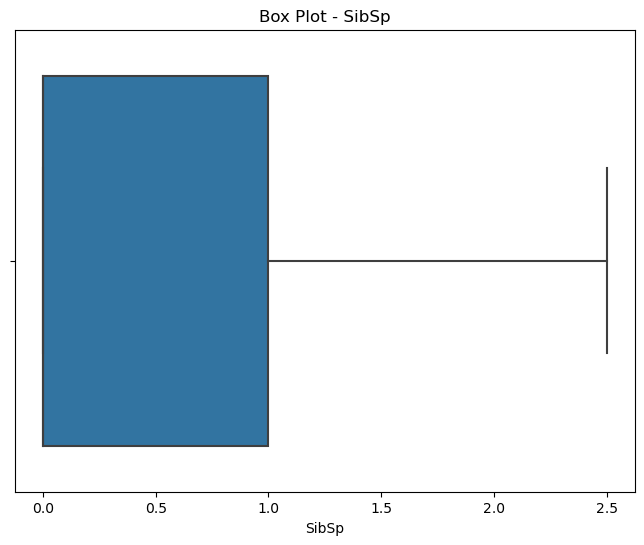

In [17]:
# Plot box plots for columns with numeric data
numeric_cols = ['Age', 'Fare', 'SibSp']
for column in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot - {column}")
    plt.show()

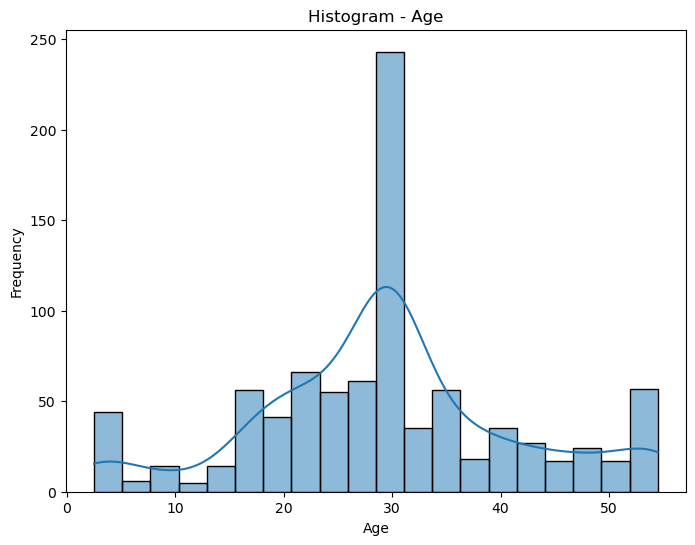

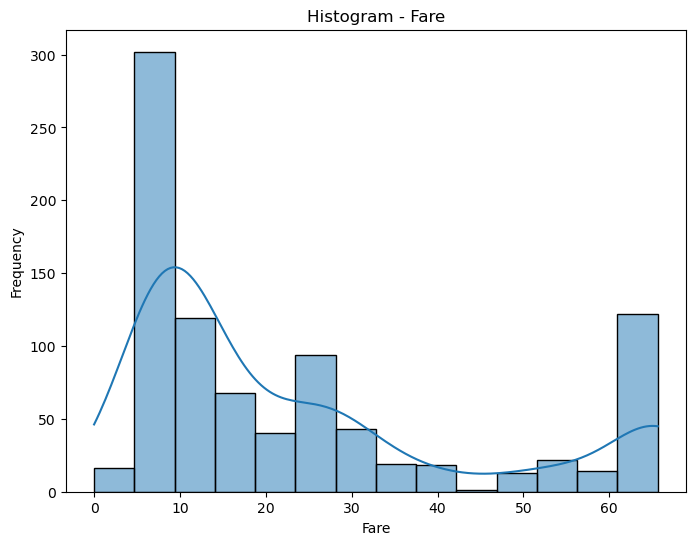

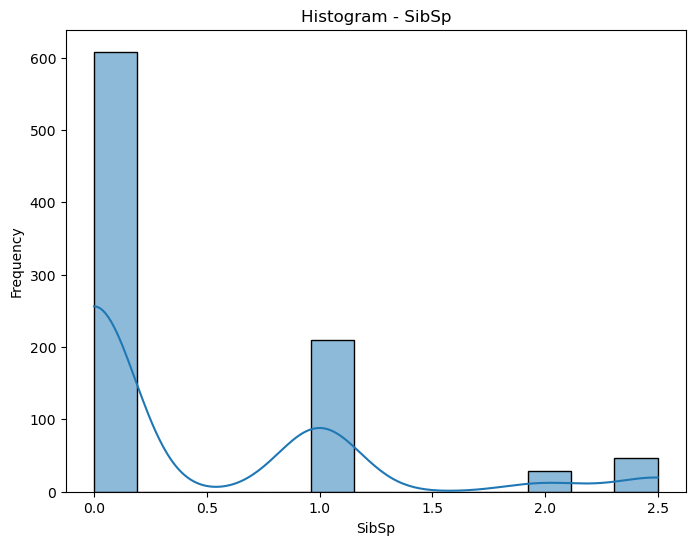

In [18]:
# Plot histograms for columns with numeric data
for column in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram - {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [19]:
# Step 5: Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [20]:
#  Perform min-max scaling on the feature set (with 'Survived' as the target)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = df_encoded.drop('Survived', axis=1)
target = df_encoded['Survived']

In [21]:
# Fit and transform the features using min-max scaling
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [22]:
# Concatenate the scaled features with the target variable
df_scaled = pd.concat([scaled_features, target], axis=1)

In [23]:
# Print the first few rows of the scaled dataset
print("Scaled dataset:")
print(df_scaled.head())


Scaled dataset:
   Pclass       Age  SibSp  Parch      Fare  Name_Abbing, Mr. Anthony  \
0     1.0  0.375000    0.4    0.0  0.110460                       0.0   
1     0.0  0.682692    0.4    0.0  1.000000                       0.0   
2     1.0  0.451923    0.0    0.0  0.120745                       0.0   
3     0.0  0.625000    0.4    0.0  0.809027                       0.0   
4     1.0  0.625000    0.0    0.0  0.122649                       0.0   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                               0.0                                    0.0   
1                               0.0                                    0.0   
2                               0.0                                    0.0   
3                               0.0                                    0.0   
4                               0.0                                    0.0   

   Name_Abelson, Mr. Samuel  Name_Abelson, Mrs. Samuel (Hannah Wizosky)  ...